# Worksheet 02

Name: Ryan Chung
UID: U33101958

### Topics

- Effective Programming

### Effective Programming

a) What is a drawback of the top down approach?

No runnable code until the end 

b) What is a drawback of the bottom up approach?

There can be no problem with code a and no problem with code b individually, but when you implement the a and b together, it could raise even more issues 
Nobody is that good at planning, will inevitably face problems 

c) What are 3 things you can do to have a better debugging experience?

Don't try to find a quick fix (you still have the next day to fix it with a fresh mind)
Read the error - where/what is causing the error; is it a cause or a symptom 
Reread the code - can you mentally trace through the code to reproduce the error in your head 

d) (Optional) Follow along with the live coding. You can write your code here:

In [1]:
# 8 queen 
# create board, interface for board, board class, cmd line 
class Board:
    # 8x8 chess board, what inputs do I need 
    # maybe add parameter later to support n-queen
    def __init__(self): 
        # we may not need input, but we need attributes for the board --> rows, cols, items at each position 
        self.board = [["-" for _ in range(8)] for _ in range(8)]

    # print the board in the cmd line 
    def __repr__(self): 
        res = ""
        # 8 can be replaced w length of board, replace w board length if subject to change
        for row in range(8): 
            for col in range(8):
                res += self.board[row][col] 
                res += " "
            res += "\n"
        return res
    
    # now we want to set/unset the queens
    def set_queen_at(self, row, col): 
        self.board[row][col] = "Q"

    def unset_queen_on_row(self, row):
        self.board[row] = ["-" for _ in range(8)]

    # now top down approach 
    def find_solution(self): 
        # we need to start at top left and place queen
        # then next place we can put it? cannot be same row, same col, same diag
        # if we cannot place it --> next position (col) --> what if we get to end? backtrack bc previous queen might be causing problems
        # when we place queen on last row, we know we are done (if next row is out of bounds)
        row = 0 
        col = 0 
        
        while row < 8: 
            # searching for solution
            # check if position we're at is valid 
            if self.is_valid_move(row, col): 
                self.set_queen_at(row, col)
                row += 1
                col = 0 
            else: 
                col += 1
                # what about if we are at last possible column --> change position of queen before
                if col >= 8: 
                    # not able to place a queen on this row
                    # backtrack and adjust position of queen on previous row
                    # how? get the position 
                    col = self.get_queen_on_row(row - 1) # this gets the col of PREV queen 
                    # increment by 1 for next position 
                    col += 1 
                    row -= 1

        # notice how fxn names (white) are not defined yet --> top down method where we create the 
        # functions as we progress over the higher order code 


        # found solution 
        print("Found solution: ")
        print(self)


# repr allows to print 
test = Board() 
test.set_queen_at(1,1)
print(test)
test.unset_queen_on_row(1)
print(test)
# if in separate 8queen file, python3 8queen.py to print board 

- - - - - - - - 
- Q - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 

- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 



## Exercise

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Complete the code below to read in a filepath to the `train.csv` and returns the DataFrame.

In [2]:
import pandas as pd

df = pd.read_csv('train.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Complete the code so it returns the number of rows that have at least one empty column value

In [3]:
print("there are " +  str(len(df[df.isnull().any(axis=1)])) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Complete the code below to remove all columns with more than 200 NaN values

In [4]:
df = df.dropna(axis=1, thresh=df.shape[0] - 200)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Complete the code below to replaces `male` with 0 and `female` with 1

In [5]:
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e) Complete the code below to add four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column.

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

Anything not clearly one of the above 4 categories can be ignored.

In [16]:
df[['First Name', 'Middle Name', 'Last Name', 'Title']] = df['Name'].str.split(', |\.\s|\s', expand=True)[[2, 3, 0, 1]]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,None,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


f) Complete the code below to replace all missing ages with the average age

In [17]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,None,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe.

<Axes: title={'center': 'Average Age by Survival Status'}, xlabel='Survival Status', ylabel='Average Age'>

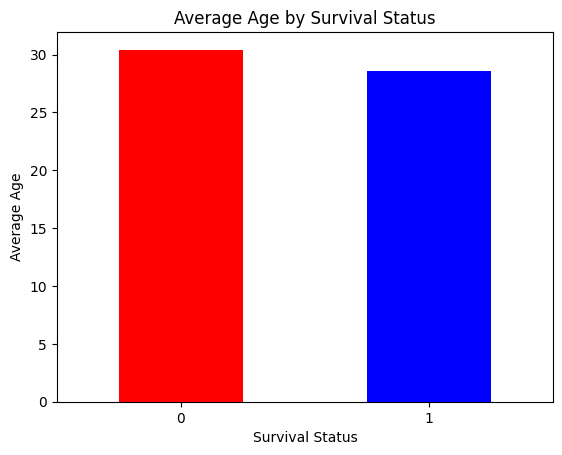

In [23]:
df.groupby('Survived')['Age'].mean().plot(kind='bar', rot=0, color=['red', 'blue'], xlabel='Survival Status', ylabel='Average Age', title='Average Age by Survival Status')

The plot shows that younger people on average survived in comparison to older people. The average age of people that did not survive is ~30 years old while the age of those who survived is ~28 years old.